In [3]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn

def CubicSplines(datos):
    """
    Implementación trazadores cúbicos
    Entradas:
    datos -- lista de puntos (x, y) en el plano ordenados por x

    Salidas:
    a -- vector de coeficientes (constantes)
    b -- vector de coeficientes (lineales)
    c -- vector de coeficientes (cuadráticos)
    d -- vector de coeficientes (cúbicos)
    """
    n = len(datos)-1
    # Inicializar vectores auxiliares
    A = [x[1] for x in datos]
    X = [x[0] for x in datos]
    H = [0.0 for x in range(n)]
    B = [0.0 for x in range(n+1)]
    C = [0.0 for x in range(n+1)]
    D = [0.0 for x in range(n+1)]
    alpha = [0.0 for x in range(n)]
    mu = [0.0 for x in range(n+1)]
    lo = [1.0 for x in range(n+1)]
    z = [0.0 for x in range(n+1)]

    # Crear vector $H$
    for i in range(n):
        H[i] = X[i+1]-X[i]

    # Crear vector $\alpha$
    for i in range(1, n):
        alpha[i] = (3/H[i])*(A[i+1]-A[i])-(3/H[i-1])*(A[i]-A[i-1])

    # Solucionar sistema tridiagonal
    for i in range(1, n):
        lo[i] = 2*(X[i+1]-X[i-1])-H[i-1]*mu[i-1]
        mu[i] = H[i]/lo[i]
        z[i] = (alpha[i]-H[i-1]*z[i-1])/lo[i]

    # Solucionar sistema tridiagonal
    for j in range(n-1, -1, -1):
        C[j] = z[j]-mu[j]*C[j+1]
        B[j] = (A[j+1]-A[j])/(H[j])-H[j]*(C[j+1]+2*C[j])/3
        D[j] = (C[j+1]-C[j])/(3*H[j])

    # Retornar vectores $A$, $B$, $C$, $D$
    return A[:-1], B[:-1], C[:-1], D[:-1]

In [4]:
#Datos de prueba $(0,1)$, $(1,e)$, $(2,e^2)$ y $(3,e^3)$
datos = [(-2,0), (0,-1), (1,1), (2,2), (4,0)]
a, b, c, d = CubicSplines(datos)
print("Vectores de coeficientes:")
print("A =", a)
print("B =", b)
print("C =", c)
print("D =", d)

Vectores de coeficientes:
A = [0, -1, 1, 2]
B = [-1.4318181818181817, 1.3636363636363638, 1.875, 0.13636363636363646]
C = [0.0, 1.3977272727272727, -0.8863636363636365, -0.8522727272727273]
D = [0.23295454545454544, -0.7613636363636364, 0.01136363636363639, 0.14204545454545456]


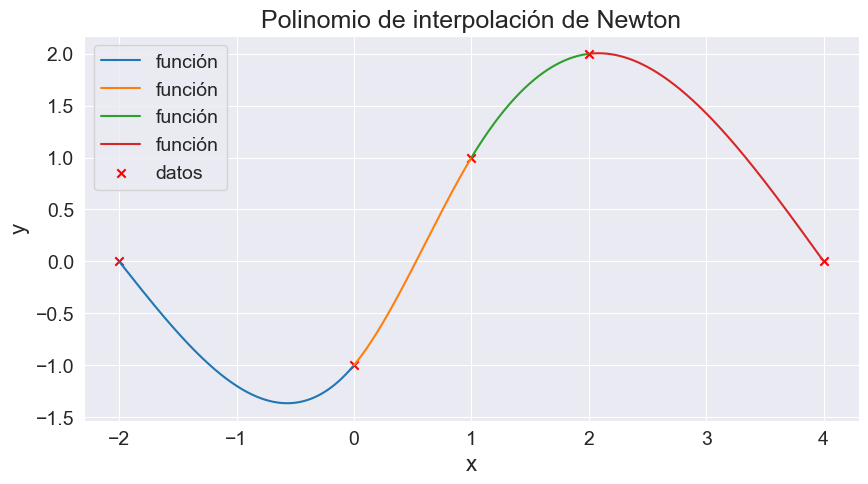

In [9]:
datos_x, datos_y = [-2,0,1,2,4], [0,-1,1,2,0]
s_0 = lambda x: a[0] + b[0]*(x+2) + c[0]*(x+2)**2 + d[0]*(x+2)**3
s_1 = lambda x: a[1] + b[1]*(x) + c[1]*(x)**2 + d[1]*(x)**3
s_2 = lambda x: a[2] + b[2]*(x-1) + c[2]*(x-1)**2 + d[2]*(x-1)**3
s_3 = lambda x: a[3] + b[3]*(x-2) + c[3]*(x-2)**2 + d[3]*(x-2)**3

fig, ax = plt.subplots(figsize=(10, 5))
x_0 =np.linspace(-2, 0, 1000)
x_1 =np.linspace(0, 1, 1000)
x_2 =np.linspace(1, 2, 1000)
x_3 =np.linspace(2, 4, 1000)

plt.plot(x_0, s_0(x_0), label='función')
plt.plot(x_1, s_1(x_1), label='función')
plt.plot(x_2, s_2(x_2), label='función')
plt.plot(x_3, s_3(x_3), label='función')
plt.scatter(datos_x, datos_y, label='datos', color='red', marker='x')

ax.tick_params(labelsize=14, axis='x')
ax.tick_params(labelsize=14, axis='y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title(f'Polinomio de interpolación de Newton', fontsize=18)
plt.legend(fontsize=14)
plt.show()